<a href="https://colab.research.google.com/github/sevvalbilgi/Titanic_Project/blob/main/rock_paper_scss_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycocotools #webcam input için gerekli bir kütüphane
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=ce3e64e26ddc5e5aaa7de46a0e4c8e2ef6538546587afaaf8489eaa8d310693c
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
work_dir= "/content/drive/MyDrive/SKILLIT Courses/AI Level 2/Final Project"
os.chdir(work_dir)

In [ ]:
from colab_utils import imshow, videoGrabber
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output #ekranı temizlemek için kullanılıyor

%tensorflow_version 2.X
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tqdm.auto import tqdm #Belirli bir etkinliğin ilerlemesini gösteren bir durum çubuğu oluşturmak içi kunllanılır

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
CLASS_NAME= ['Paper', 'Rock', 'Scissor']

# Fonksiyon Çalışma Mantığı

1. Bu fonksiyonda video, web kamerasından gelen video akışıdır.
2. numImage görüntülerini yakalayan bir for döngüsünde:
3. Videodaki mevcut görüntüyü numpy dizisine dönüştürüyoruz
4. Ve bu numpy dizisini mevcut boş resim dizisi img[]'nin sonuna ekliyoruz.
5. Etiket verilmişse etiketi y[]'ye uygularız.
6. Sonunda Img ve y'yi numpy dizileri olarak döndürüyoruz çünkü numpy dizilerinin dönüştürülmesi ve düzenlenmesi normal dizilerden daha kolaydır

In [ ]:
def capture_images (numImage=100,label='Null'):

  vid=videoGrabber(showVideo=True, size= (60,40))
  img=[]
  y=[]

  for x in tqdm(range(numImage)):
    new_image = np.array(vid(0))
    img.append(new_image)
    if label!='Null':
      y.append(label)
  img = np.array(img)
  y = np.array(y)
  return img,y

In [ ]:
paper_images, paper_label= capture_images(numImage=100, label=0)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
rock_images, rock_label= capture_images(numImage=100,label=1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
scissor_images, scissor_label= capture_images(numImage= 100,label=2)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
train_images = np.concatenate((paper_images, rock_images, scissor_images)) #concatenate sınıfları birleştirmek için kullanılıyor
train_images= train_images/255
train_labels= np.concatenate((paper_label, rock_label, scissor_label))

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#görüntüleri dönüştüren bir veri oluşturucu nesnesi oluşturur
datagen= ImageDataGenerator(
rotation_range= 40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip= True,
fill_mode='nearest')

idx = 0
new_train_images = []
new_train_labels= []
for image in train_images:
  img= image.reshape((1,)+image.shape) #görüntüyü 3 boyutlu yapma (1,60,40)
  i=0
  for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): #bu loop sürekli dönmekte
      plt.figure(i)
      #print(batch[0])
      plot= plt.imshow(batch[0])
      i+=1
      new_train_images.append(batch[0])
      new_train_labels.append(train_labels[idx])
      if i> 10:
        break
  idx+=1



In [ ]:
new_train_images = np.array(new_train_images)
new_train_labels = np.array(new_train_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(40,60,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 56, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 24, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 12, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 8, 64)          102464    
                                                                 
Total params: 156160 (610.00 KB)
Trainable params: 15616

In [ ]:
model.add(layers.Flatten()) #üç boyutlu veriyi tek boyuta (1D) dönüştürmek için
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 56, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 24, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 12, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 8, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 1536)              0

In [ ]:
#training model
model.compile(optimizer= 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history= model.fit(new_train_images, new_train_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 18s 160ms/step - loss: 1.1026 - accuracy: 0.3355
Epoch 2/10
104/104 [==============================] - 18s 176ms/step - loss: 1.0990 - accuracy: 0.3309
Epoch 3/10
104/104 [==============================] - 18s 173ms/step - loss: 1.0977 - accuracy: 0.3406
Epoch 4/10
104/104 [==============================] - 18s 171ms/step - loss: 1.0989 - accuracy: 0.3264
Epoch 5/10
104/104 [==============================] - 16s 158ms/step - loss: 1.0969 - accuracy: 0.3606
Epoch 6/10
104/104 [==============================] - 16s 157ms/step - loss: 1.0989 - accuracy: 0.3455
Epoch 7/10
104/104 [==============================] - 18s 175ms/step - loss: 1.0975 - accuracy: 0.3533
Epoch 8/10
104/104 [==============================] - 18s 170ms/step - loss: 1.0820 - accuracy: 0.3964
Epoch 9/10
104/104 [==============================] - 17s 159ms/step - loss: 1.0727 - accuracy: 0.4030
Epoch 10/10
104/104 [==============================] - 16s 157ms/step - l

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


Text(0.5, 1.0, 'Scissor')

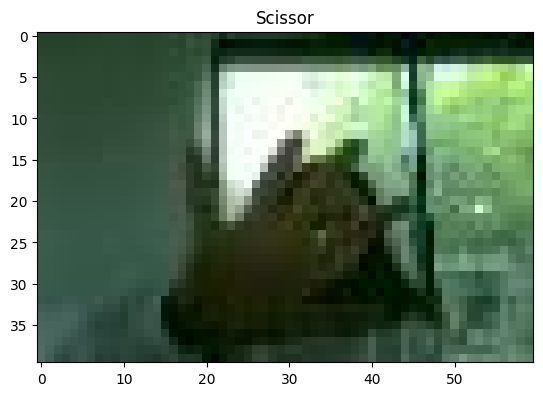

In [ ]:
test_image, _= capture_images(1)

test_image= test_image/255
prediction= model.predict(test_image)
plt.imshow(test_image[0])
plt.title(CLASS_NAME[np.argmax(prediction[0])])

In [ ]:
model.save('self-made_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
